# Librairies

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

## 1.Écoulement de Marangoni sur un film de savon tendu à l'horizontal

Le film de savon à une épaisseur $H$ et est caractésié par une tension de surface $\gamma_0$. Lors du dépôt de la goutte la tension de surface diminue localement et donne lieu à un gradient de tension de surface $$\dfrac{\partial \gamma}{\partial r} \sim \dfrac{\Delta\gamma}{R}$$

La contrainte à l'interface s'écrit $$\eta \dfrac{\partial v}{\partial z} = \dfrac{\partial \gamma}{\partial r}$$

Si on suppose que la goutte s'étale et entraîne le liquide sur l'épaisseur du film de savon en loi d'échelle il vient :

$$\eta\dfrac{v}{H}\sim \dfrac{\Delta\gamma}{R}$$

On a deux inconnues, $R$ et $U$. On pourrait clore le problème en connaissant le débit de l'écoulement. Dans le cas de la goutte, l'écoulement est instationnaire c'est compliqué. On peut tenter d'intégrer l'équation  précédente par rapport au temps en supposant que les autres paramètres sont indépendant de $r$ et du temps.

$$R(t) \sim \sqrt{2\dfrac{\Delta\gamma H}{\eta} t}$$

En suivant l'étalement du front de la goutte on pourrait identifier la valeur de $\Delta\gamma$

C:\Users\ledou\AppData\Local\Temp\ipykernel_20488\3631610865.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*gamma*H*t/eta) + r0


array([0.02364921])

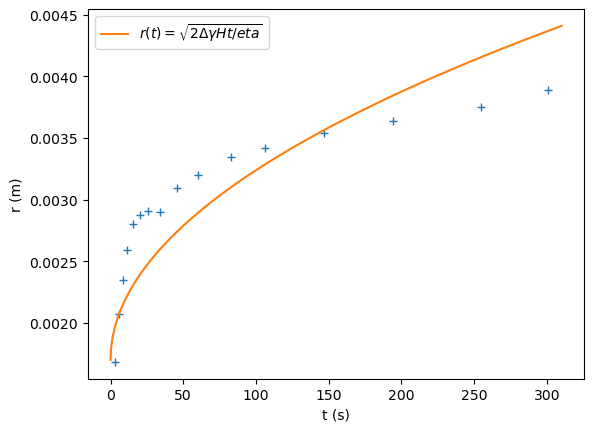

In [68]:
t = np.linspace(0,310,1000)
H = 5e-10
eta = 1e-3 # Pa.s
r0 = 1.7e-3
def r1(t, gamma):
    return np.sqrt(2*gamma*H*t/eta) + r0
df = pd.read_csv('SDS2cmc_Spreading_on_soap_film.csv', sep = ';')
# données du papier Surfactant-surfactant interactions govern unusual Marangoni spreading on a soap film
#Melika Motaghian 2022
# print(df)
R2cmc = df['r'].to_numpy()*1e-3
T2cmc = df['t'].to_numpy()

popt, pcov = curve_fit(r1, T2cmc, R2cmc)

plt.figure()
plt.plot(T2cmc,R2cmc, '+')
plt.plot(t, r1(t, *popt), label = '$r(t) = \sqrt{2\Delta\gamma H t/eta}$')
plt.xlabel('t (s)')
plt.ylabel('r (m)')
plt.legend()
popt


Dans ce cas on observe un ajustement plus proche des données expérimentales avec un $alpha = 1/3$ vec une constante $C$ qui dépend de $\Delta \gamma$ et de l'épaisseur du liquide. 

On peut proposer une autre loi d'echelle pour tenter de mesurer $\Delta\gamma$ en mesurant la taille de l'étalement au bout d'un certain temps $\tau$. 
En reprenant la relation entre la vitesse et $\Delta \gamma$

$$\eta\dfrac{v}{H} \sim \eta\dfrac{R}{\tau}\dfrac{1}{H}\sim \dfrac{\Delta\gamma}{R}$$

Il vient alors que $$\Delta\gamma \sim \dfrac{\eta R^2}{\tau H}.$$ Ainsi en mesurant $R,H$ et $\tau$. On devrait obtenir une mesure de $\Delta\gamma$. 

# 

## 2. On suppose maintenant que la quandtité de mouvement diffuse sur une certaine épaisseur 

Voir Doccuments Application pour la mise en forme des lois d'échelle. On trouve une longueur de pénétration de la quantité de mouvement $$l_v = \sqrt{\dfrac{\eta R}{\rho v}}$$

Dans ce cas la relation $$\eta \dfrac{\partial v}{\partial z} = \dfrac{\partial \gamma}{\partial r}$$ devient

$$\eta \dfrac{V}{l_v} \sim \dfrac{\Delta\gamma}{R}$$
Soit : 

$$\Delta\gamma \sim \sqrt{\eta\rho R V^3}$$

ou 

$$\Delta\gamma \sim \sqrt{\eta\rho/\tau^3}R^2$$

array([2.52830641e-09])

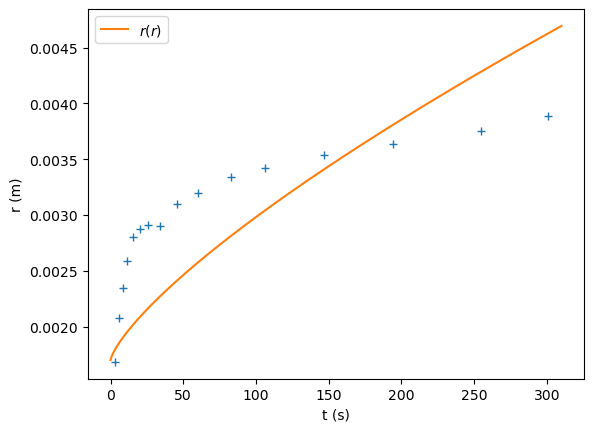

In [67]:

t = np.linspace(0,310,1000)
eta = 1e-3 # Pa.s
r0 = 1.7e-3
rho = 1000 # kg/m3
def r34(t, gamma):
    return (3/4*(gamma**2/eta/rho)**(1/3)*t)**(3/4)+r0


df = pd.read_csv('SDS2cmc_Spreading_on_soap_film.csv', sep = ';')
# données du papier Surfactant-surfactant interactions govern unusual Marangoni spreading on a soap film
#Melika Motaghian 2022
# print(df)
R2cmc = df['r'].to_numpy()*1e-3
T2cmc = df['t'].to_numpy()

popt, pcov = curve_fit(r34, T2cmc, R2cmc)

plt.figure()
plt.plot(T2cmc,R2cmc, '+')
plt.plot(t, r34(t, *popt), label = '$r(t)$')
#plt.plot(t,r(t,gamma))
plt.xlabel('t (s)')
plt.ylabel('r (m)')
plt.legend()
popt


En réalité c'est beaucoup plus compliqué $\Delta\gamma$ dépend du profil de concentration en tensioactif qui lui même va varier spatiallement donc $\Delta\gamma$ n'est pas constant et dépend de $r$.
On pourrait proposer un ajutement du type $r\propto t^\alpha$


array([0.00038594, 0.31228511])

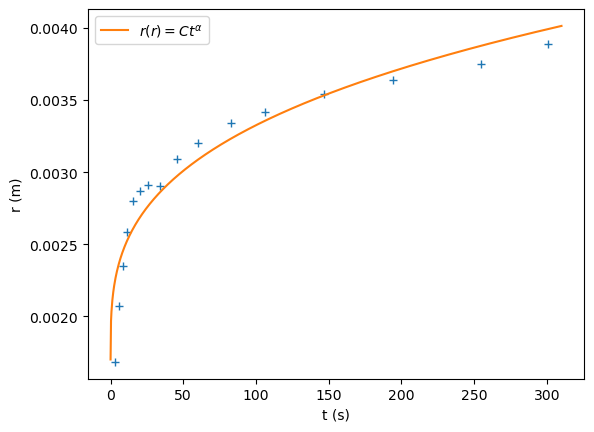

In [71]:
def r(t, C, alpha):
    return C*t**alpha + r0

gamma = 60e-3 # N/m

df = pd.read_csv('SDS2cmc_Spreading_on_soap_film.csv', sep = ';')
# données du papier Surfactant-surfactant interactions govern unusual Marangoni spreading on a soap film
#Melika Motaghian 2022

# print(df)
R2cmc = df['r'].to_numpy()*1e-3
T2cmc = df['t'].to_numpy()

popt, pcov = curve_fit(r, T2cmc, R2cmc)

plt.figure()
plt.plot(T2cmc,R2cmc, '+')
plt.plot(t, r(t, *popt), label = r'$r(r) = C t^{\alpha}$')
#plt.plot(t,r(t,gamma))
plt.xlabel('t (s)')
plt.ylabel('r (m)')
plt.legend()
popt

## 2. Une façon de se défaire du problème instationnaire est d'imposer un flux de tensioactif par exemple à la surface d'un bassin d'eau

Dans quel cas on a imposé un débit Q, un débit molaire de tensioactif. La conservation du débit impose que (en choisissant un volume de controle d'extension spatial $A = \pi R^2$ et de profondeur $l_c$): 

$$Q = A\times D \dfrac{\partial c}{\partial z}$$

La longueur $l_c$ provient de la diffusion du tensioactif donc de l'exquation de convection diffusion qui en stationnaire donne : 

$$ U \dfrac{\partial c}{\partial r} = D\dfrac{\partial^2 c}{\partial z}\Rightarrow \dfrac{Uc}{R}\sim \dfrac{Dc}{l_c^2}$$

Donc $$l_c \sim \sqrt{DR/U}$$

Dans ce cas $$Q \sim A c* \sqrt{DU}{R}\sim c\sqrt{R^3DU}$$

En combinant cette équation avec $$\Delta\gamma \sim \sqrt{\eta\rho R V^3}$$

On peut déterminer une expression pour R et V

$$    R_{\rm max}^{a} \propto \left(\frac{Q}{c^{*}}\right)^{3/4}\left(\frac{\eta\rho}{\Delta\gamma^2 D^3}\right)^{1/8}.$$
$$ V_{\rm max}^{a}\propto\left(\frac{c^{*}\Delta\gamma^3}{Q}\right)^{1/4}\left(\frac{D}{(\eta\rho)^3}\right)^{1/8}.$$



[ 1.00000000e+00 -9.61944379e-07]


c:\Users\ledou\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([ 1.00000000e+00, -9.61944379e-07])

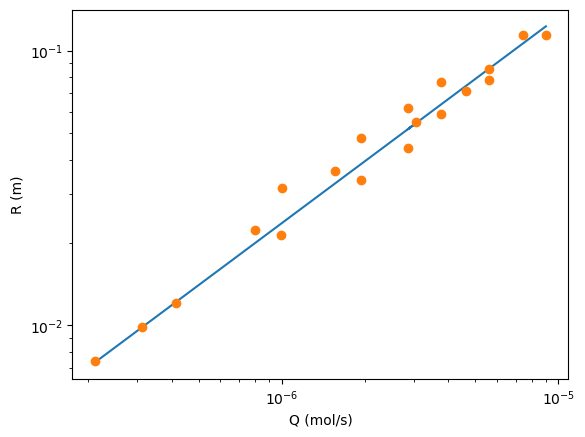

In [131]:
dfVQ = pd.read_csv('MarangoniSLeroux _VQ.csv', sep = ';')
dfRQ = pd.read_csv('MarangoniSLeroux.csv', sep = ';')
# données du papier Soluble surfactant spreading: How the amphiphilicity sets the Marangoni hydrodynamics
# S. Le Roux
R = dfRQ['R']
Qr = dfRQ['Q']

V = dfVQ['V']
Qv = dfVQ['Q']

plt.figure()
c = 15
eta =1e-3
rho = 1000 
D = 1e-6
def r(Qr, a, gamma):
    return (Qr/c)**(3/4)*(eta*rho/gamma**2/D**3)**(1/8)
popt, pcov = curve_fit(r, Qr, R)
print(popt)
plt.plot(Qr, r(Qr,*popt))
plt.plot(Qr,R, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Q (mol/s)')
plt.ylabel('R (m)')
popt



array([0.27148726])

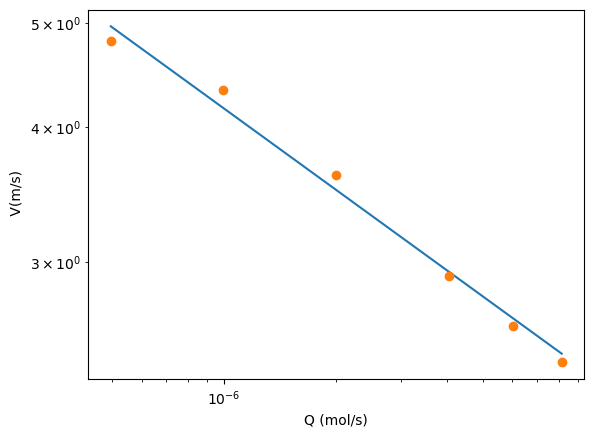

In [130]:
plt.figure()
def v(Qv, gamma):
    return (c*gamma**3/Qv)**(1/4)*(D/(eta*rho)**3)**(1/8)
popt, pcov = curve_fit(v, Qv[:], V[:])
plt.plot(Qv, v(Qv,*popt))
plt.plot(Qv,V, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Q (mol/s)')
plt.ylabel(' V(m/s)')
popt